<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 100.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 152.9 MB/s eta 0:00:00


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
## Write your code here
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop_duplicates(inplace = True)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [42]:
## Write your code here
coding_activities = df['CodingActivities'].isnull().sum()

print("Number of missing values in 'CodingActivities' column:", coding_activities)

Number of missing values in 'CodingActivities' column: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
## Write your code here
df['CodingActivities'].ffill()

0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3        Hobby;Contribute to open-source projects;Other...
4        Hobby;Contribute to open-source projects;Other...
                               ...                        
65432                        Hobby;School or academic work
65433             Hobby;Contribute to open-source projects
65434                                                Hobby
65435    Hobby;Contribute to open-source projects;Profe...
65436    Hobby;Contribute to open-source projects;Profe...
Name: CodingActivities, Length: 65437, dtype: object

In [44]:
coding_activities = df['CodingActivities'].isnull().sum()
print("Number of missing values in 'CodingActivities' column:", coding_activities)

Number of missing values in 'CodingActivities' column: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [16]:
## Write your code here
df['ConvertedCompYearly'].isnull().value_counts()


ConvertedCompYearly
True     42002
False    23435
Name: count, dtype: int64

In [22]:

df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)
print(df['ConvertedCompYearly'].isnull().value_counts())


ConvertedCompYearly
False    65437
Name: count, dtype: int64


/tmp/ipykernel_416/2949979782.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [23]:
## Write your code here
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)


In [24]:
print(df['ConvertedCompYearly_MinMax'].isnull().value_counts())
print(df['ConvertedCompYearly_MinMax'].mean())

ConvertedCompYearly_MinMax
False    65437
Name: count, dtype: int64
0.0052996491679282885


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [25]:
## Write your code here
mean_value = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev


#df['ConvertedCompYearly_Zscore'] = (
#    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) /
#    df['ConvertedCompYearly'].std()
#)

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


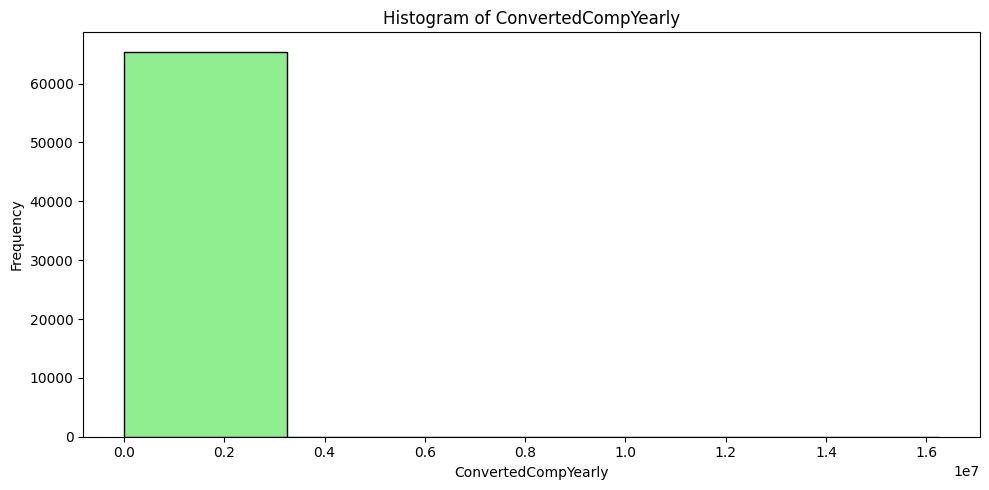

In [43]:
## Write your code here

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Plot histogram for 'ConvertedCompYearly'

plt.hist(df['ConvertedCompYearly'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

plt.tight_layout()


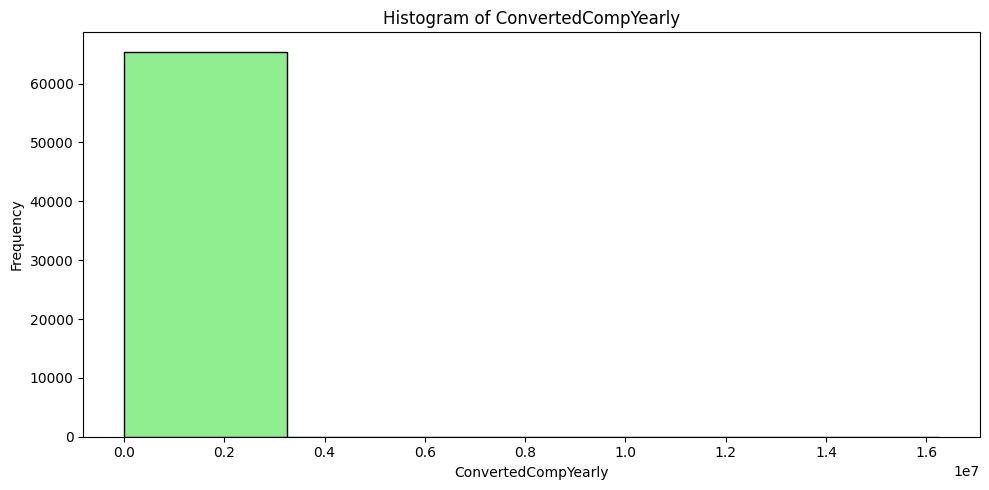

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Plot histogram for 'ConvertedCompYearly'

plt.hist(df['ConvertedCompYearly'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

plt.tight_layout()


Text(0.5, 1.0, 'ConvertCompYearly_MinMax Bins')

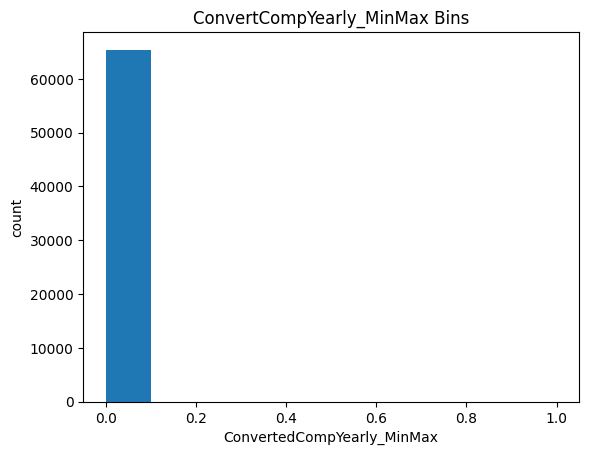

In [28]:
#sns.displot(df['ConvertedCompYearly_MinMax'], kind="hist", height=5, aspect = 1.5)
plt.pyplot.hist(df["ConvertedCompYearly_MinMax"])

plt.pyplot.xlabel("ConvertedCompYearly_MinMax")
plt.pyplot.ylabel("count")
plt.pyplot.title("ConvertCompYearly_MinMax Bins")

Text(0.5, 1.0, 'ConvertCompYearly_Zscore Bins')

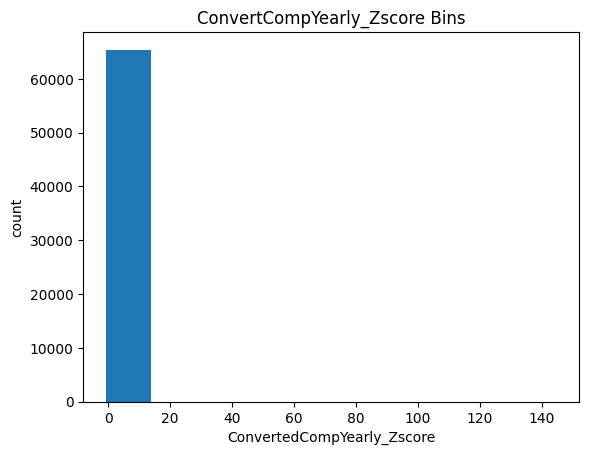

In [29]:
plt.pyplot.hist(df["ConvertedCompYearly_Zscore"])

plt.pyplot.xlabel("ConvertedCompYearly_Zscore")
plt.pyplot.ylabel("count")
plt.pyplot.title("ConvertCompYearly_Zscore Bins")


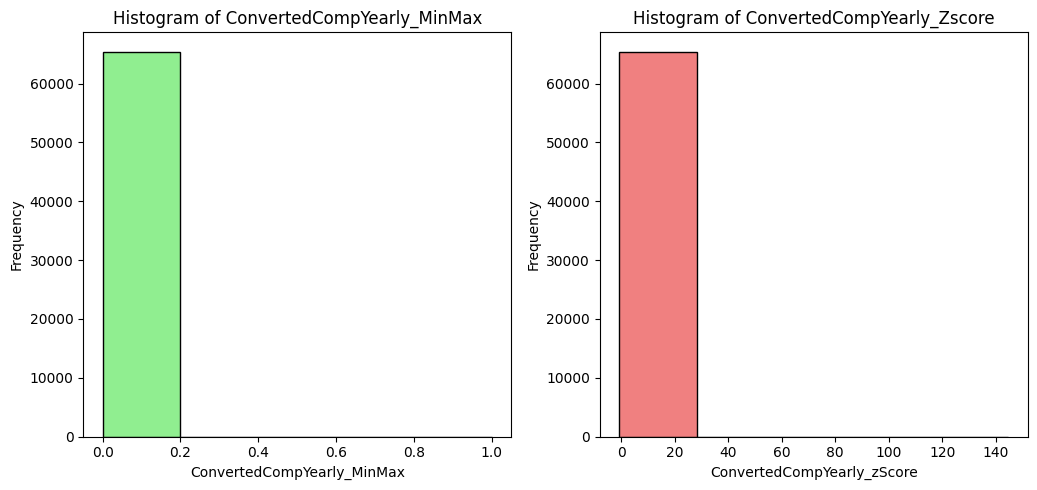

In [36]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=5, color='lightcoral', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_Zscore')
plt.xlabel('ConvertedCompYearly_zScore')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
